In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from itertools import cycle
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "Times New Roman"
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

### This notebook is used to make the plots generated by the v2 bftt model (the one with logistic death properly implemented) for the supplementary info

In [2]:
max_gRate = 0.083 #max growth rate of the bacteria
K = 1000 #carrying capacity for the regular simulations
big_K = 10000 #carring capacity for the big_K simulations
duration_fig4 = 100. #duration of the simulations used for the figure 4 plots

# Effect of increasing/decreasing K (was Figure S4 in the original supplementary material, rImm = 0.55)
### Didn't bother with the extra long simulation as it doesn't seem like there's any point

In [40]:
# comparing the effects of changing system size (K)
#N* = 1.17
fig4c_rImm_0_55_v2_K_1k  = pd.read_csv("solo_results_K_1000_v2/ratios4c_rImmig_0_55-stochastic_pop_over_time_K_1000_v2.csv")
fig4c_rImm_0_55_v2_K_10k = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_55-stochastic_pop_over_time_v2.csv")

fig4c_rImm_0_55_K_comparison_pops = [fig4c_rImm_0_55_v2_K_1k, fig4c_rImm_0_55_v2_K_10k]

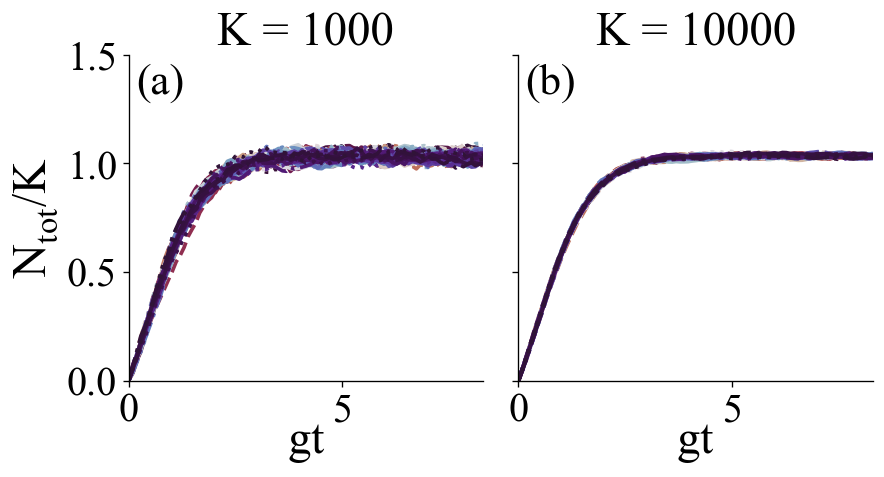

In [43]:
fig, axes = plt.subplots(1,2, figsize=(8, 3.6), dpi=120, sharey=True)
plt.subplots_adjust(wspace=0.1)
letters = ['a', 'b', 'c']
K_vals = [1000, 10000, 10000]

for i, ax in enumerate(axes):
    
    K_val = K_vals[i]
    pop_dataset = fig4c_rImm_0_55_K_comparison_pops[i]
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column

    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::1]) #allows us to alternate line styles for the different runs
    
    for p in range(nCols):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=2.2, color=colors[p], ls=next(linecycler))
        
    ax.set_xlabel("$gt$", fontsize=28, labelpad=-5)
    ax.set_title(f"K = {K_val}", fontsize=28)
    
    if i != 1: ax.set_ylabel("N$_{tot}$/K", fontsize=28)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=26, horizontalalignment='left', verticalalignment='top')
    ax.tick_params(axis='both', which='major', labelsize=24)
    #ax.plot(deterministicPops_4c_rim_0_55['t'], deterministicPops_4c_rim_0_55['N'], ls="-.", lw=2.2, color='#ff0066')
    
    ax.set_ylim(0, 1.5)
    if i < 2: ax.set_xlim(0, 8.3)
    else: ax.set_xlim(0, 833)
    
plt.savefig('paper_plots_v2/rImmig_0.55_K_comparison_v2.pdf', bbox_inches='tight', dpi=330)
plt.show()

### The inclusion of logistic death in the v2 model generally means that the immigration rate needs to be increased to obtain the same results as the old pseudologistic model.

### Therefore, the K comparison figure was recreated but increasing rImm = 0.55 -> 0.7

# Effect of increasing/decreasing K (was Figure S4 in the original supplementary material, rImm = 0.7)

In [42]:
fig4c_rImm_0_7_v2_K_1k  = pd.read_csv("solo_results_K_1000_v2/ratios4c_rImmig_0_7-stochastic_pop_over_time_K_1000_v2.csv")
fig4c_rImm_0_7_v2_K_10k = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_7-stochastic_pop_over_time_v2.csv")

fig4c_rImm_0_7_K_comparison_pops = [fig4c_rImm_0_7_v2_K_1k, fig4c_rImm_0_7_v2_K_10k]

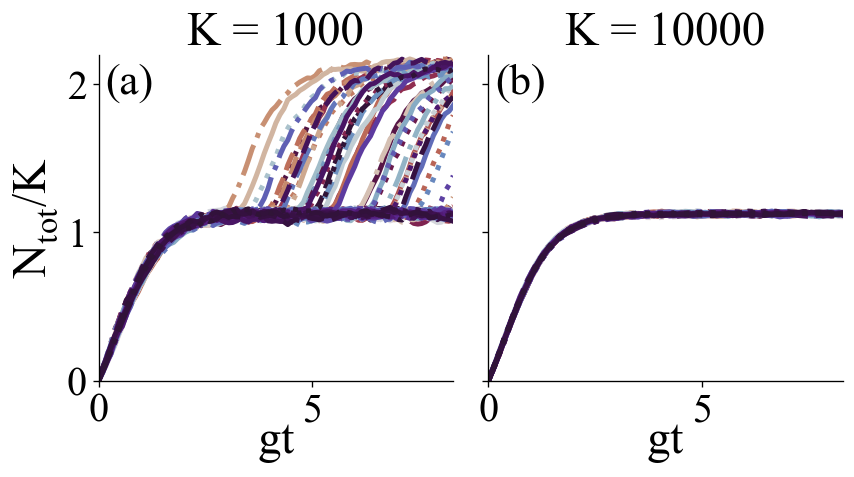

In [59]:
fig, axes = plt.subplots(1,2, figsize=(8, 3.6), dpi=120, sharey=True)
plt.subplots_adjust(wspace=0.1)
letters = ['a', 'b', 'c']
K_vals = [1000, 10000, 10000]

for i, ax in enumerate(axes):
    
    K_val = K_vals[i]
    pop_dataset = fig4c_rImm_0_7_K_comparison_pops[i]
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column

    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::1]) #allows us to alternate line styles for the different runs
    
    for p in range(nCols):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=3, color=colors[p], ls=next(linecycler))
        
    ax.set_xlabel("$gt$", fontsize=28, labelpad=-5)
    ax.set_title(f"K = {K_val}", fontsize=28)
    
    if i != 1: ax.set_ylabel("N$_{tot}$/K", fontsize=28)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=26, horizontalalignment='left', verticalalignment='top')
    ax.tick_params(axis='both', which='major', labelsize=24)
    #ax.plot(deterministicPops_4c_rim_0_55['t'], deterministicPops_4c_rim_0_55['N'], ls="-.", lw=2.2, color='#ff0066')
    ax.set_ylim(0, 2.2)
    if i < 2: ax.set_xlim(0, 8.3)
    else: ax.set_xlim(0, 833)
    
plt.savefig('paper_plots_v2/rImmig_0.7_K_comparison_v2.pdf', bbox_inches='tight', dpi=330)
plt.show()

## Figure S5 in the original supplementary material (the 2x2 plots showing pop growth for various r_imm and N*/K = 1.17)

In [5]:
def readDeterministicData(filepath):
    '''
    method to read in Chris' deterministic data into pandas dataframe.
    Need to set delimiter to space, and also deal with the leading whitespace in the 1st column which produces a column of NaNs
    '''
    df = pd.read_csv(filepath, sep=" ", header=None, names=["blank", 't', 'N_edge', 'N'])
    df = df.drop(columns=['blank'])
    #truncate the data so that it's for the same duration as the stochastic ones
    return df[df['t'] < duration_fig4*max_gRate]

In [36]:
#figS5_rImms = [0.55, 0.6, 0.7, 0.8] # outdated - these were used for the pseudologistic comparison
figS5_rImms = [0.6, 0.75, 0.8, 0.9]

# deterministic data
#this is the deterministic data calculated via Chris' code
# 4c refers to the fact they use the same ratios as in figure 4c
deterministicPops_4c_rImm_0_55 = readDeterministicData("../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.55_ns1.17.dat")
deterministicPops_4c_rImm_0_6  = readDeterministicData("../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.6_ns1.17.dat")
deterministicPops_4c_rImm_0_7  = readDeterministicData("../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.7_ns1.17.dat")
deterministicPops_4c_rImm_0_75 = readDeterministicData("../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.75_ns1.17.dat")
deterministicPops_4c_rImm_0_775= readDeterministicData("../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.775_ns1.17.dat")
deterministicPops_4c_rImm_0_78 = readDeterministicData("../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.780_Ns1.17.dat")
deterministicPops_4c_rImm_0_8  = readDeterministicData("../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.5_ri0.8_ns1.17.dat") # in the deterministic model, this is predicted to have finite thickness
deterministicPops_4c_rImm_0_9  = readDeterministicData("../biofilm_threshold_theory/patrick_deterministic_data/dynamics_rm0.8_rd0.5_ri0.9_ns1.17.dat")
#readDeterministicData("../biofilm_threshold_theory/chris_deterministic_data/dynamics")
#these are the equivalent values used for the 4c paper plots
# deterministicPops_4c_list = [deterministicPops_4c_rImm_0_55, deterministicPops_4c_rImm_0_6, deterministicPops_4c_rImm_0_7, deterministicPops_4c_rImm_0_8]
deterministicPops_4c_list = [deterministicPops_4c_rImm_0_6, deterministicPops_4c_rImm_0_75, deterministicPops_4c_rImm_0_8, deterministicPops_4c_rImm_0_9]

# stochastic data
stochasticPops_4c_rImm_0_55_v2  = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_55-stochastic_pop_over_time_v2.csv")
stochasticPops_4c_rImm_0_6_v2   = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_6-stochastic_pop_over_time_v2.csv")
stochasticPops_4c_rImm_0_7_v2   = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_7-stochastic_pop_over_time_v2.csv")
stochasticPops_4c_rImm_0_75_v2  = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_75-stochastic_pop_over_time_v2.csv")
stochasticPops_4c_rImm_0_775_v2 = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_775-stochastic_pop_over_time_v2.csv") # DOES THIS RESULT IN FINITE GROWTH???
stochasticPops_4c_rImm_0_8_v2   = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_8-stochastic_pop_over_time_v2.csv") # in the deterministic model, this is predicted to have finite thickness
stochasticPops_4c_rImm_0_9_v2   = pd.read_csv("solo_results_bigK_v2/ratios4c_rImmig_0_9-stochastic_pop_over_time_v2.csv")

#stochasticPops_4c_list = [stochasticPops_4c_rImm_0_55_v2, stochasticPops_4c_rImm_0_6_v2, stochasticPops_4c_rImm_0_7_v2, stochasticPops_4c_rImm_0_8_v2]
stochasticPops_4c_list = [stochasticPops_4c_rImm_0_6_v2, stochasticPops_4c_rImm_0_75_v2, stochasticPops_4c_rImm_0_8_v2, stochasticPops_4c_rImm_0_9_v2]


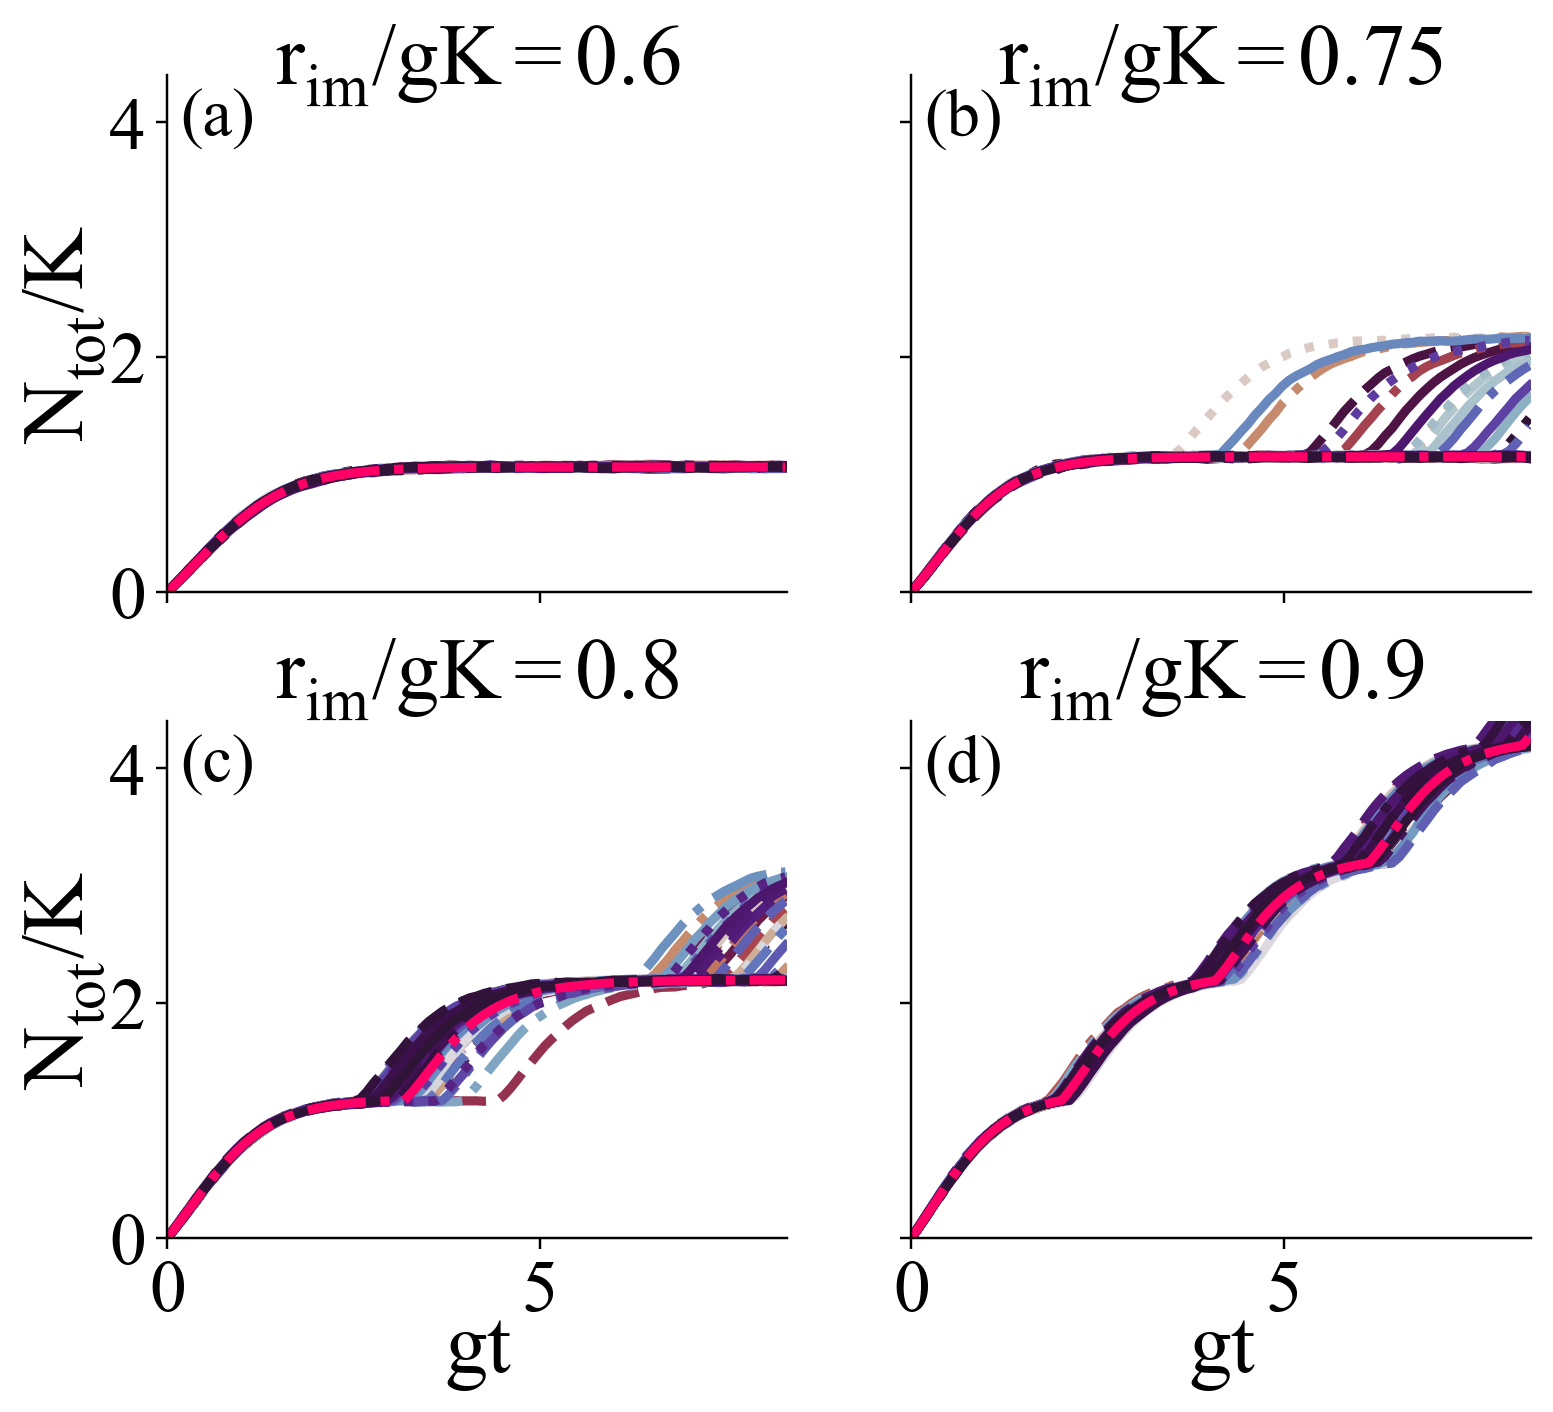

In [61]:
fig, axs = plt.subplots(2,2, figsize=(8,7), dpi=220, sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.25)
K_val = 10000
i = 0
letters = ['a', 'b', 'c', 'd']

for ax in axs.flat:
    
            
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    pop_dataset = stochasticPops_4c_list[i]
    deterministic_pops = deterministicPops_4c_list[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines[::-1])
    for p in range(nCols):

        ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=3, color=colors[p], ls=next(linecycler))
        
    ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=3, color='#ff0066')
    
    
    ax.set_title("r$_{im}/gK = $"+str(figS5_rImms[i]), fontsize = 28, pad=-2.4)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.set_xlim(0, 8.33)
    ax.set_ylim(0, 4.4)
    ax.set_xlabel('gt', fontsize=28, labelpad=-5)
    ax.set_ylabel('N$_{tot}$/K', fontsize=28, labelpad=0)
    
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    
    ax.label_outer()
    
    
    
    i = i+1

# fig = plt.gcf()
#fig.suptitle("Title centered above all subplots", fontsize=24)

# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.xlabel("gt", fontsize=24)
# plt.ylabel("N/K", fontsize=24)


# plt.tight_layout()
# fig.subplots_adjust(top=0.9)
plt.savefig('paper_plots_v2/s5_imm_stochastic_N^_1_17_v2.pdf', bbox_inches="tight", dpi=330)
plt.show()

## Figure S6 in the original supplementary (2x1 plot of stochastic vs deterministic growth for N*< K)

### This should be pretty similar to the pseudologistic stochastic results, as the logistic death stuff only arises for when N*>K 

### (UPDATE: YEP, the v2 plots are functionally identical to the old versions (the ones without logistic death)

In [32]:
figS6_rImms = [0.4, 0.5]

# deterministic results (S6 refers to the fact these are for the Fig S6 in the supp mat)
deterministicPops_S6_rImm_0_4 = readDeterministicData("../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.9_ri0.4_ns0.7.dat")
deterministicPops_S6_rImm_0_5 = readDeterministicData("../biofilm_threshold_theory/chris_deterministic_data/dynamics_rm0.8_rd0.9_ri0.5_ns0.7.dat")
deterministicPops_S6_list = [deterministicPops_S6_rImm_0_4, deterministicPops_S6_rImm_0_5]

# stochastic results
stochasticPops_S6_rImm_0_4 = pd.read_csv("solo_results_bigK_v2/ratiosS6_rImmig_0_4-stochastic_pop_over_time_v2.csv")
stochasticPops_S6_rImm_0_5 = pd.read_csv("solo_results_bigK_v2/ratiosS6_rImmig_0_5-stochastic_pop_over_time_v2.csv")
stochasticPops_S6_list = [stochasticPops_S6_rImm_0_4, stochasticPops_S6_rImm_0_5]

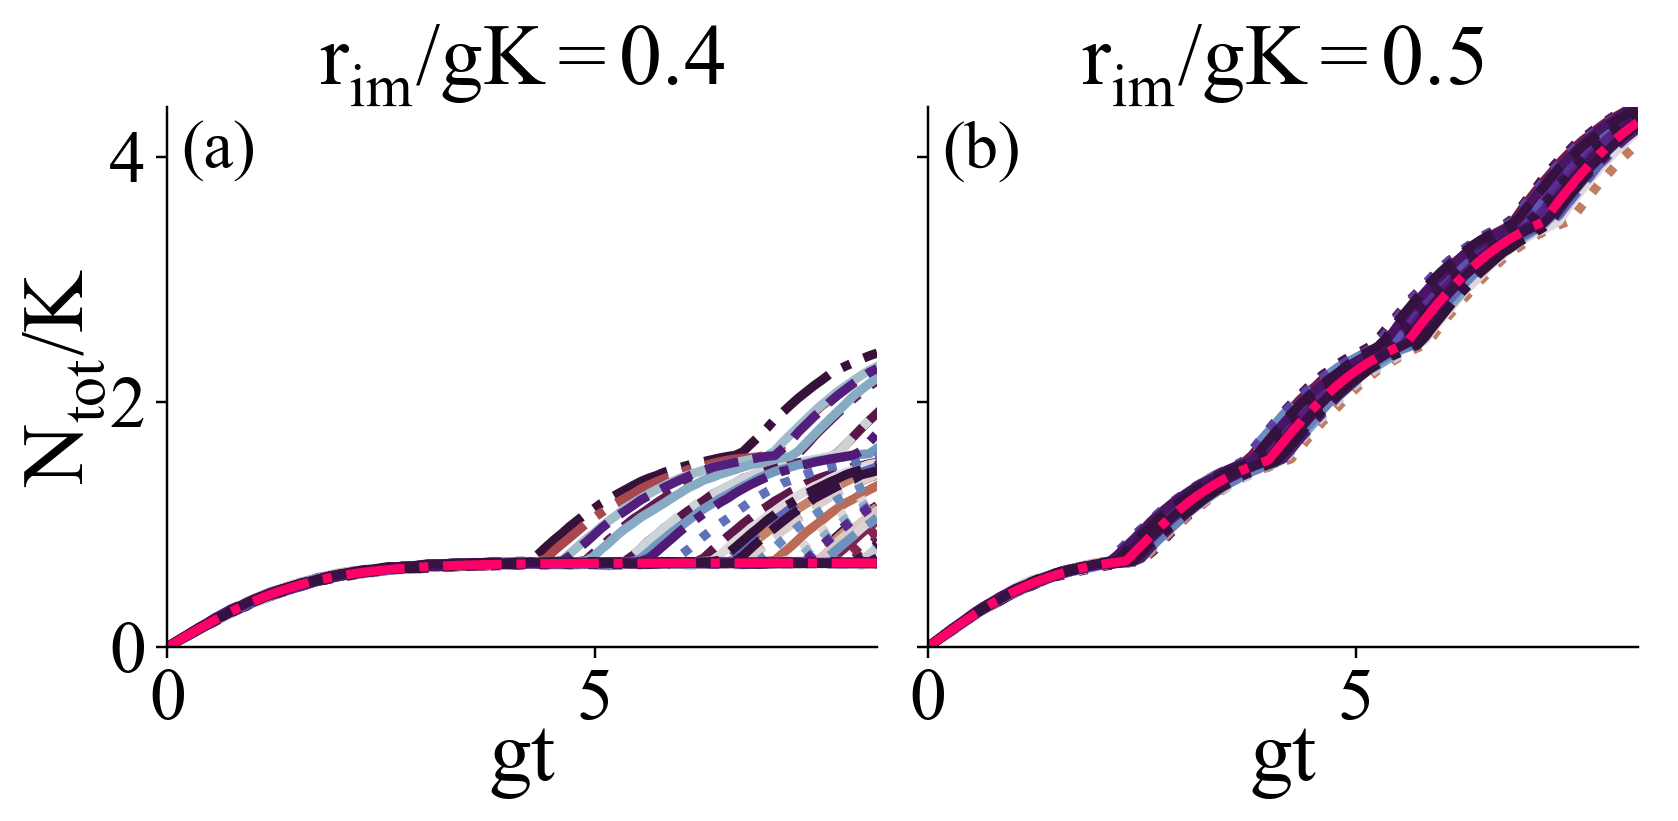

In [60]:
fig, axs = plt.subplots(1,2, figsize=(8,4.1), dpi=220, sharex=True, sharey=True)
plt.rcParams['font.sans-serif'] = "Arial"
K_val = 10000
i = 0
letters = ['a', 'b']

for ax in axs.flat:
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    pop_dataset = stochasticPops_S6_list[i]
    deterministic_pops = deterministicPops_S6_list[i]
    
    #print(type(pop_dataset))
    nCols = len(pop_dataset.columns) - 1 #no. of runs. -1 due to the time column
    colors = pl.cm.twilight_shifted_r(np.linspace(0,1,nCols))
    #allows us to alternate line styles for the different runs
    lines = ["-","--","-.",":"]
    linecycler = cycle(lines)
    for p in range(nCols):

        ax.plot(pop_dataset['t']*max_gRate, pop_dataset[str(p)]/K_val, lw=3, color=colors[p], ls=next(linecycler))
        
    ax.plot(deterministic_pops['t'], deterministic_pops['N'], ls="-.", lw=3, color='#ff0066')

    ax.set_title("r$_{im}/gK = $"+str(figS6_rImms[i]), fontsize = 28)
    ax.tick_params(axis='both', which='major', labelsize=24)
    ax.annotate("("+letters[i]+")", xy=(0.02, 0.975), xycoords='axes fraction', fontsize=22, horizontalalignment='left', verticalalignment='top')
    
    ax.set_xlabel('gt', fontsize=28, labelpad=-5)
    ax.set_ylabel('N$_{tot}$/K', fontsize=28, labelpad=0)
    
    ax.set_xlim(0, 8.3)
    ax.set_ylim(0, 4.4)
    
    ax.label_outer()
    
    i = i+1

fig = plt.gcf()
fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
# plt.xlabel("t/g$_{\max}$", fontsize=24)
# plt.ylabel("N/K", fontsize=24)

plt.tight_layout()
plt.savefig("paper_plots_v2/figsS6_stochastic_v2.pdf", bbox_inches='tight', dpi=330)
plt.show()